# Medical Data Visualizer ⛑️

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

**Data description**
- The rows in the dataset represent patients
- The columns represent information like body measurements, results from various blood tests, and lifestyle choices. 
- You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

## Importing data and checking key stats 📖
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [608]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Analyze 🧐
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Add 'overweight' column

In [610]:
# Add an overweight column to the data. 
# To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
# If that value is > 25 then the person is overweight. 
# Use the value 0 for NOT overweight and the value 1 for overweight.

BMI = round((df['weight'] / (df['height'] / 100) ** 2), 2)
df['overweight'] = BMI >= 25
df['overweight'] = df['overweight'].astype(int) #convert Boolean to integer 0 for NOT overweight and 1 for overweight 

print(df['overweight'].value_counts())

1    43700
0    26300
Name: overweight, dtype: int64


#### Normalize data by making 0 always good and 1 always bad

In [611]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

# normalize the 'cholesterol' column
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

# normalize the 'gluc' column
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

print(df['cholesterol'].value_counts())
print(df['gluc'].value_counts())

0    52385
1    17615
Name: cholesterol, dtype: int64
0    59479
1    10521
Name: gluc, dtype: int64


#### Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

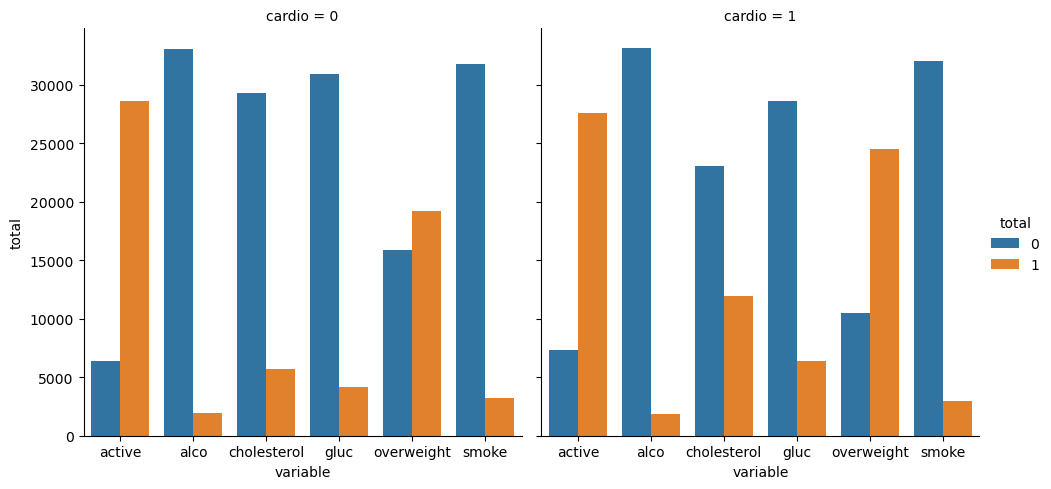

In [612]:
# Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). 
# The dataset should be split by 'Cardio' so there is one chart for each cardio value. 
# The chart should look like examples/Figure_1.png.

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], id_vars=['cardio'])

# Rename the columns
df_cat = df_cat.rename(columns={'variable': 'variable', 'value': 'total', 'cardio': 'cardio'})

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
df_cat = df_cat.groupby(['variable', 'cardio', 'total'], as_index=False).size()

# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, x='variable', y='size', hue='total', col='cardio', kind='bar')
fig.set(xlabel='variable', ylabel='total')

# Get the figure for the output
fig = fig.fig

# Save the figure as 'catplot.png'
fig.savefig('catplot.png')

# Show the figure
plt.show()

## Clean the data to check correlation 🧹 
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

**Filter out the following patient segments that represent incorrect data:**
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [645]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

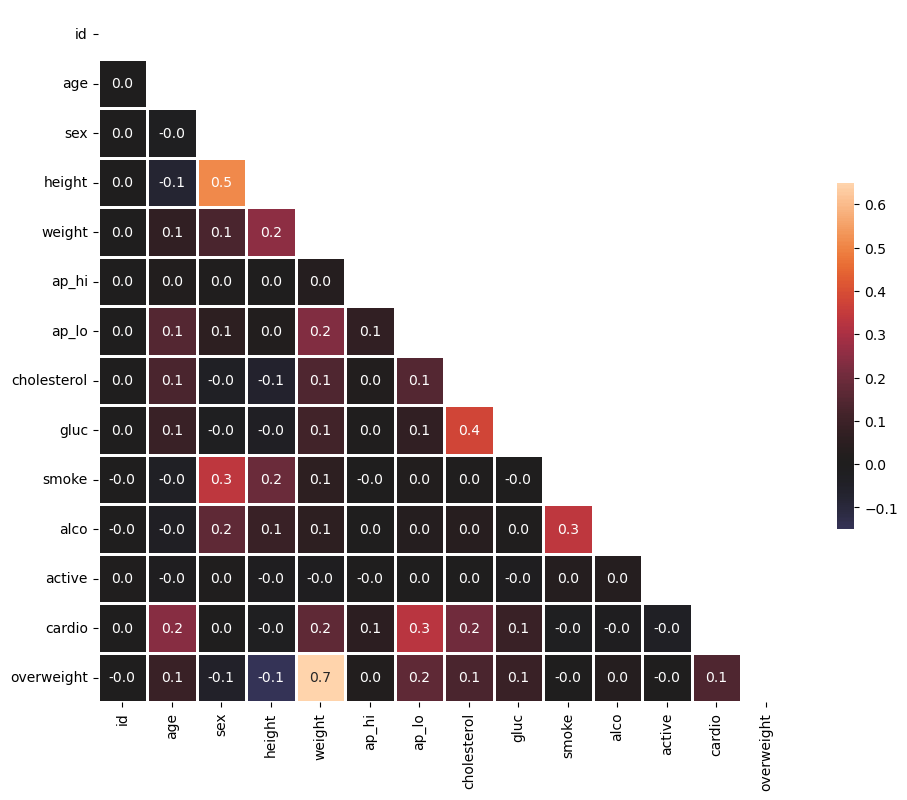

In [646]:
# Calculate the correlation matrix
corr = round((df_heat.corr()),2)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap with 'sns.heatmap()'

sns.heatmap(corr,mask=mask, fmt='.1f', linewidths=1,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)

plt.show()

In [647]:
# Save the figure as 'catplot.png'
fig.savefig('heatmap.png')